# Estatísticas das três árvores

In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import Normalize

In [3]:
def plotTreesLines(df, x, y, x_label, y_label, title):
    sns.set_style("whitegrid")

    # Criar a figura
    palette = ["#228B22", "#0047AB", "#D22B2B"]
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df, x=x, y=y, hue="Tipo_Arvore", palette=palette)

    # Rótulos e título com melhor formatação
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    # Remover as bordas superior e direita
    sns.despine(top=True, right=True)

    # Retirar grade
    plt.grid(False)
    # Ajustar layout
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()

In [16]:
BST_df = pd.read_csv('bst.csv')
AVL_df = pd.read_csv('avl.csv')
RBT_df = pd.read_csv('rbt.csv')

df = pd.concat([BST_df, AVL_df, RBT_df])
df

,Num_Docs,Altura,Total_Nos,Profundidade_Media,Profundidade_Minima,Max_Desbalanceamento,Tempo_Total_Indexacao,Tempo_Medio_Insercao,Densidade_Arvore,Maior_Galho,Menor_Galho,Total_Comparacoes_Indexacao,Tempo_Maximo_Busca_Amostra,Comparacoes_Total_Busca_Amostra,Tempo_Medio_Busca_Amostra_Por_Palavra,Comparacoes_Medias_Busca_Amostra_Por_Palavra,Tipo_Arvore
0,1,28,1709,11.6489,5,0,0.519,0.000304,3.183260e-06,28,5,66130,0.002,9929,0.000016,9.929,BST
1,2,28,2194,12.1240,5,0,0.669,0.000305,4.086640e-06,28,5,89814,0.014,10306,0.000108,10.306,BST
2,3,31,3555,13.4487,5,0,0.975,0.000274,8.277130e-07,31,5,159823,0.003,11025,0.000005,11.025,BST
3,4,31,3670,13.4875,5,0,1.037,0.000283,8.544880e-07,31,5,168876,0.003,11128,0.000004,11.128,BST
4,5,31,4147,13.6610,5,0,1.178,0.000284,9.655490e-07,31,5,190965,0.003,11520,0.000004,11.520,BST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,18,43595,13.8391,11,7,629.393,0.014437,8.315100e-02,18,11,10882933,0.005,12364,0.000264,12.364,BRT
296,297,18,43652,13.8409,11,7,631.851,0.014475,8.325970e-02,18,11,10910455,0.004,12651,0.000296,12.651,BRT
297,298,18,43694,13.8424,11,7,633.402,0.014496,8.333990e-02,18,11,10925845,0.004,12404,0.000276,12.404,BRT
298,299,18,43702,13.8427,11,7,634.241,0.014513,8.335510e-02,18,11,10934789,0.004,12438,0.000281,12.438,BRT


In [ ]:
df.loc[df[df['Tipo_Arvore'] == 'BRT'], 'Tipo_Arvore'] = 'RBT'

KeyError: "None of [Index([(False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...)], dtype='object')] are in the [index]"

### Crescimento Estrutural
#### Altura da Árvore

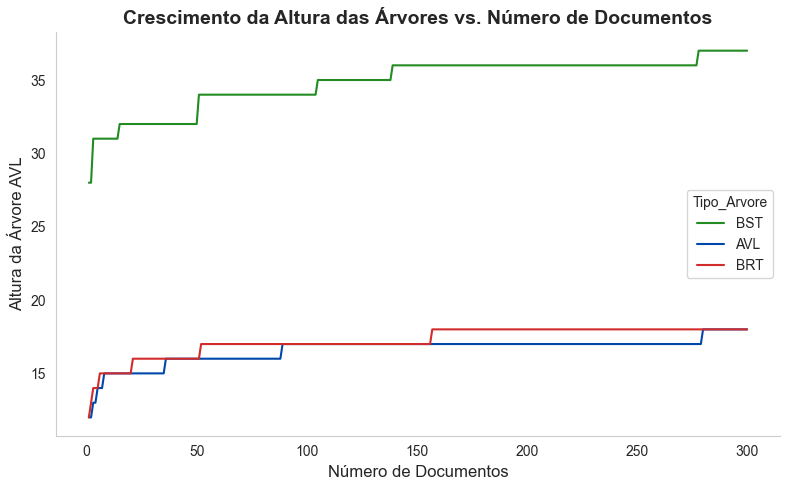

In [5]:
plotTreesLines(df, "Num_Docs", "Altura", "Número de Documentos", "Altura da Árvore AVL", "Crescimento da Altura das Árvores vs. Número de Documentos")

### Profundidade Média

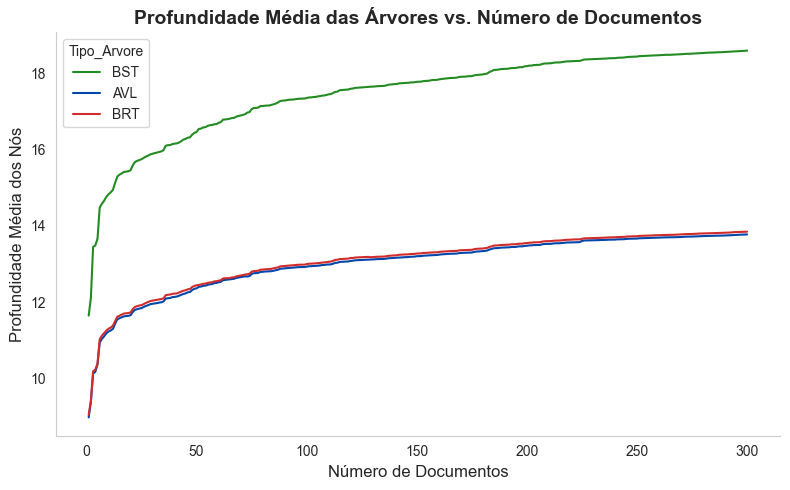

In [6]:
plotTreesLines(df, "Num_Docs", "Profundidade_Media", "Número de Documentos", "Profundidade Média dos Nós", "Profundidade Média das Árvores vs. Número de Documentos")

##### Comparação da Profundidade Média de cada árvore com a escala logaritmica 

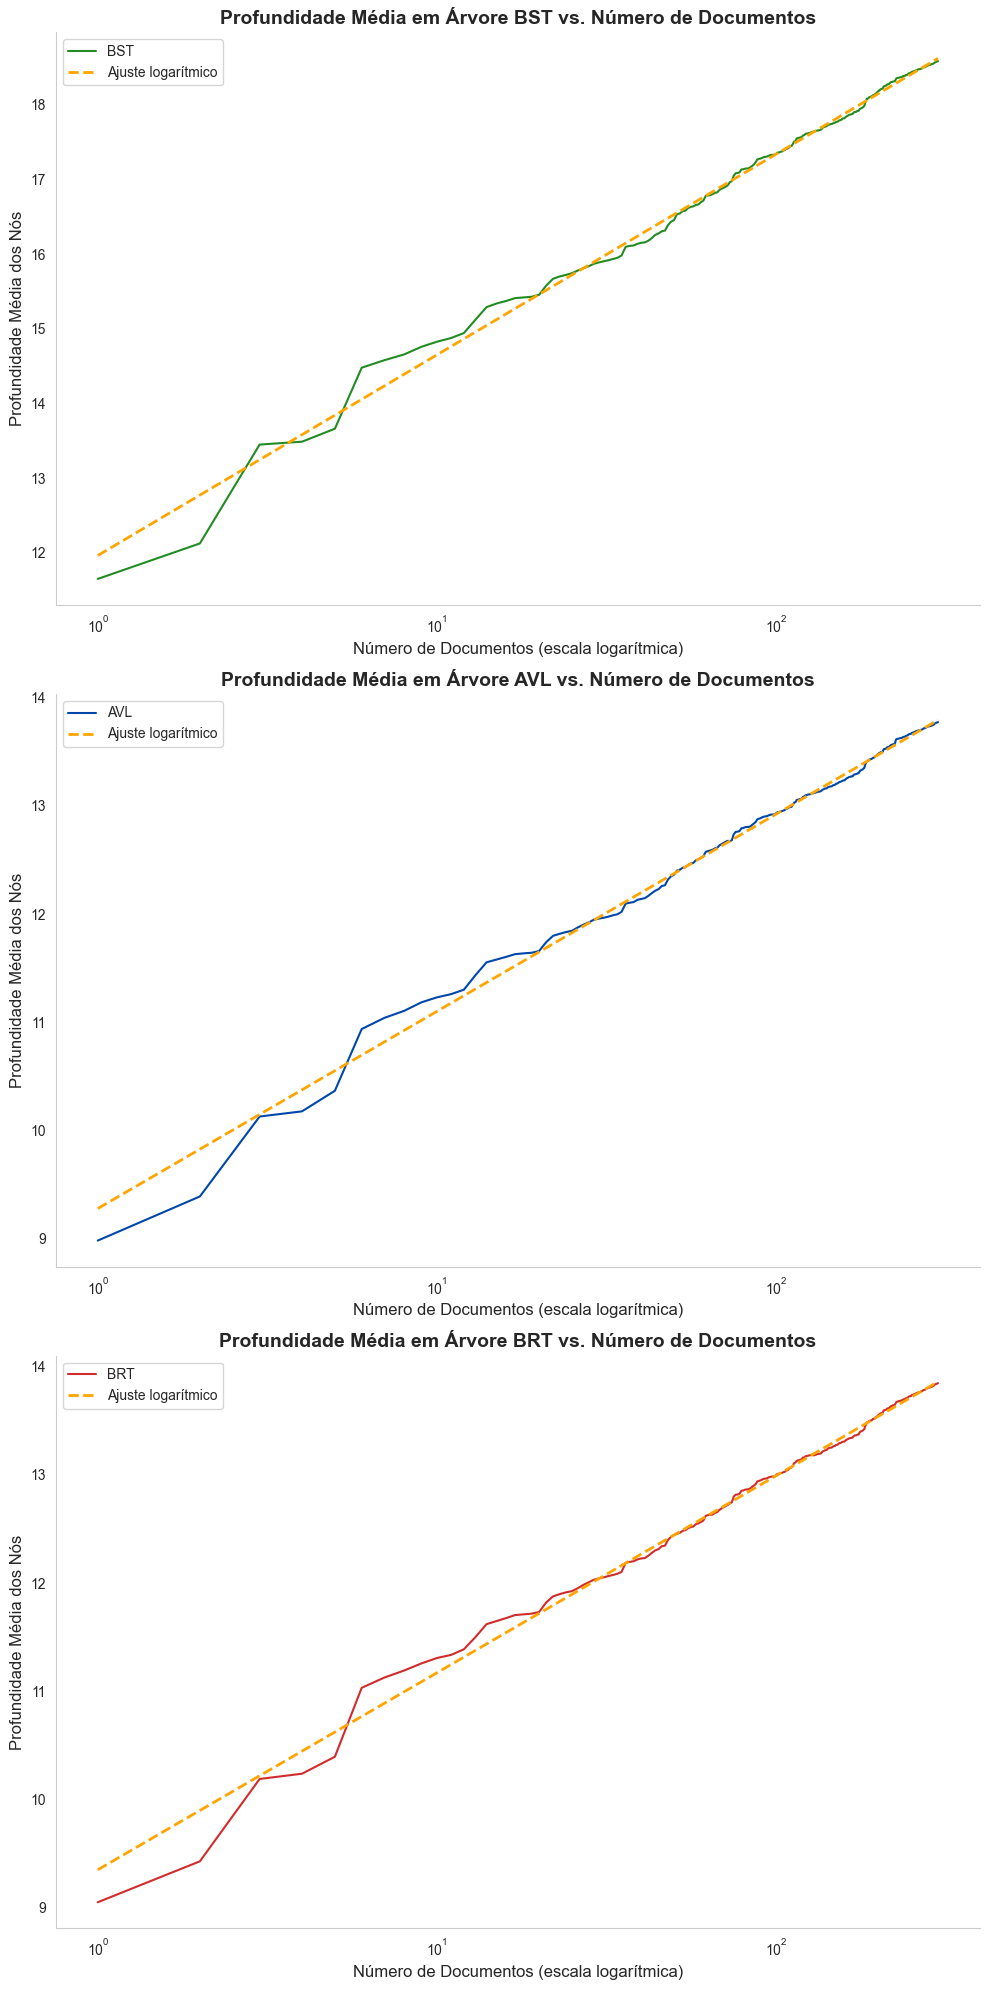

In [7]:

# Estilo visual
sns.set_style("whitegrid")

plt.figure(figsize=(10,20))

# Grafico da BST
plt.subplot(3,1,1) 
# Dados
n_docs = df[df['Tipo_Arvore'] == 'BST']['Num_Docs']
profundidade_media = df[df['Tipo_Arvore'] == 'BST']['Profundidade_Media']

# Ajuste logarítmico (modelo: y = a * log(x) + b)
log_n_docs = np.log(n_docs)
coef = np.polyfit(log_n_docs, profundidade_media, deg=1)
ajuste = coef[0] * log_n_docs + coef[1]


plt.plot(n_docs, profundidade_media, color='#228B22', label='BST')
plt.plot(n_docs, ajuste, linestyle='--', color='orange', linewidth=2, label='Ajuste logarítmico')

# Eixo x em escala logarítmica para realçar a relação
plt.xscale('log')

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em Árvore BST vs. Número de Documentos', fontsize=14, fontweight='bold')
plt.legend()
sns.despine(top=True, right=True)

# Layout ajustado
plt.tight_layout()
plt.grid(False)

# Grafico da AVL
plt.subplot(3,1,2) 
# Dados
n_docs = df[df['Tipo_Arvore'] == 'AVL']['Num_Docs']
profundidade_media = df[df['Tipo_Arvore'] == 'AVL']['Profundidade_Media']

# Ajuste logarítmico (modelo: y = a * log(x) + b)
log_n_docs = np.log(n_docs)
coef = np.polyfit(log_n_docs, profundidade_media, deg=1)
ajuste = coef[0] * log_n_docs + coef[1]


plt.plot(n_docs, profundidade_media, color='#0047AB', label='AVL')
plt.plot(n_docs, ajuste, linestyle='--', color='orange', linewidth=2, label='Ajuste logarítmico')

# Eixo x em escala logarítmica para realçar a relação
plt.xscale('log')

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em Árvore AVL vs. Número de Documentos', fontsize=14, fontweight='bold')
plt.legend()
sns.despine(top=True, right=True)

# Layout ajustado
plt.tight_layout()
plt.grid(False)

# Grafico da BRT
plt.subplot(3,1,3) 
# Dados
n_docs = df[df['Tipo_Arvore'] == 'BRT']['Num_Docs']
profundidade_media = df[df['Tipo_Arvore'] == 'BRT']['Profundidade_Media']

# Ajuste logarítmico (modelo: y = a * log(x) + b)
log_n_docs = np.log(n_docs)
coef = np.polyfit(log_n_docs, profundidade_media, deg=1)
ajuste = coef[0] * log_n_docs + coef[1]


plt.plot(n_docs, profundidade_media, color='#D22B2B', label='BRT')
plt.plot(n_docs, ajuste, linestyle='--', color='orange', linewidth=2, label='Ajuste logarítmico')

# Eixo x em escala logarítmica para realçar a relação
plt.xscale('log')

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em Árvore BRT vs. Número de Documentos', fontsize=14, fontweight='bold')
plt.legend()
sns.despine(top=True, right=True)

# Layout ajustado
plt.tight_layout()
plt.grid(False)
# Mostrar gráfico
plt.show()


---
========================= Abaixo tem apenas dados da AVL =========================

---

O gráfico apresentado mostra a relação entre o "Número de Documentos" (em escala logarítmica) e a "Profundidade Média dos Nós" nas árvores.

**Análise:**

1.  **Dados Observados (Pontos Azuis):** Os pontos azuis representam os dados coletados, mostrando a profundidade média dos nós para diferentes números de documentos. Percebe-se que, à medida que o número de documentos aumenta, a profundidade média dos nós também aumenta.

2.  **Linha Conectando os Pontos (Linha Roxa Clara):** Essa linha mostra a trajetória dos dados observados. No início, para um número muito pequeno de documentos, a profundidade média dos nós tem um comportamento mais irregular e com saltos maiores. No entanto, à medida que o número de documentos cresce, a profundidade média dos nós se torna mais suave e previsível.

3.  **Ajuste Logarítmico (Linha Laranja Tracejada):** Uma linha de ajuste logarítmico foi sobreposta aos dados. Essa linha representa um modelo do tipo $y = a \cdot \log(x) + b$, onde $y$ é a profundidade média e $x$ é o número de documentos.

4.  **Qualidade do Ajuste Logarítmico:**
    * Para um número maior de documentos (a partir de aproximadamente $10^1$ ou 10 documentos), o ajuste logarítmico parece se encaixar muito bem aos dados observados. A linha laranja tracejada acompanha de perto os pontos azuis, indicando que a profundidade média dos nós em uma árvore AVL cresce de forma logarítmica com o número de documentos.
    * Para um número muito pequeno de documentos (abaixo de 10), o ajuste logarítmico não é tão preciso. Há uma diferença notável entre os dados observados e a linha de ajuste, especialmente na porção inicial do gráfico. Isso é esperado, pois o comportamento de uma estrutura de dados para um volume muito pequeno de elementos pode não seguir perfeitamente a complexidade assintótica que se aplica a volumes maiores.

**Conclusão:**

O gráfico ilustra um conceito fundamental sobre árvores AVL: sua altura (e, consequentemente, a profundidade média dos nós) cresce de forma logarítmica com o número de elementos. Isso é uma das principais vantagens das árvores AVL, pois garante que as operações (inserção, busca, remoção) tenham uma complexidade de tempo logarítmica, mesmo no pior caso, devido ao seu auto-balanceamento.

O ajuste logarítmico confirma essa característica teórica para um volume significativo de documentos, demonstrando empiricamente o desempenho eficiente das árvores AVL em termos de profundidade. As pequenas discrepâncias para poucos documentos são normalmente irrelevantes em cenários de uso prático, onde as árvores AVL são aplicadas para gerenciar grandes volumes de dados.

---

#### Profundidade Mínima

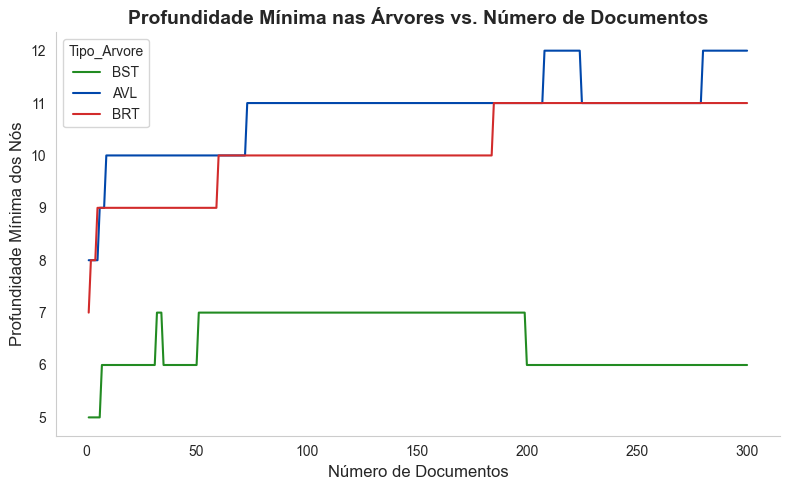

In [34]:
plotTreesLines(df, 'Num_Docs', 'Profundidade_Minima', 'Número de Documentos', 'Profundidade Mínima dos Nós', 'Profundidade Mínima nas Árvores vs. Número de Documentos')

In [ ]:

# Estilo visual limpo
sns.set_style("whitegrid")

# Dados
n_docs = df['Num_Docs']
altura = df['Altura']
prof_min = df['Profundidade_Minima']
prof_media = df['Profundidade_Media']

# Criar figura
plt.figure(figsize=(10, 6))

# Plotagens com cores distintas
plt.plot(n_docs, prof_min, linestyle='-', color='#d62728', label='Profundidade Mínima', linewidth=2, markersize=5)
plt.plot(n_docs, prof_media, linestyle='-', color='#ff7f0e', label='Profundidade Média', linewidth=2, markersize=5)
plt.plot(n_docs, altura,  linestyle='-', color='#1f77b4', label='Altura da Árvore', linewidth=2, markersize=5)

# Rótulos e título
plt.xlabel('Número de Documentos', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.title('Altura, Profundidade Média e Mínima em uma Árvore AVL', fontsize=14, fontweight='bold')

# Legenda
plt.legend(fontsize=10)

# Estética
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(top=True, right=True)
plt.grid(False)
plt.tight_layout()

# Exibir
plt.show()


Series([], Name: Num_Docs, dtype: int64)


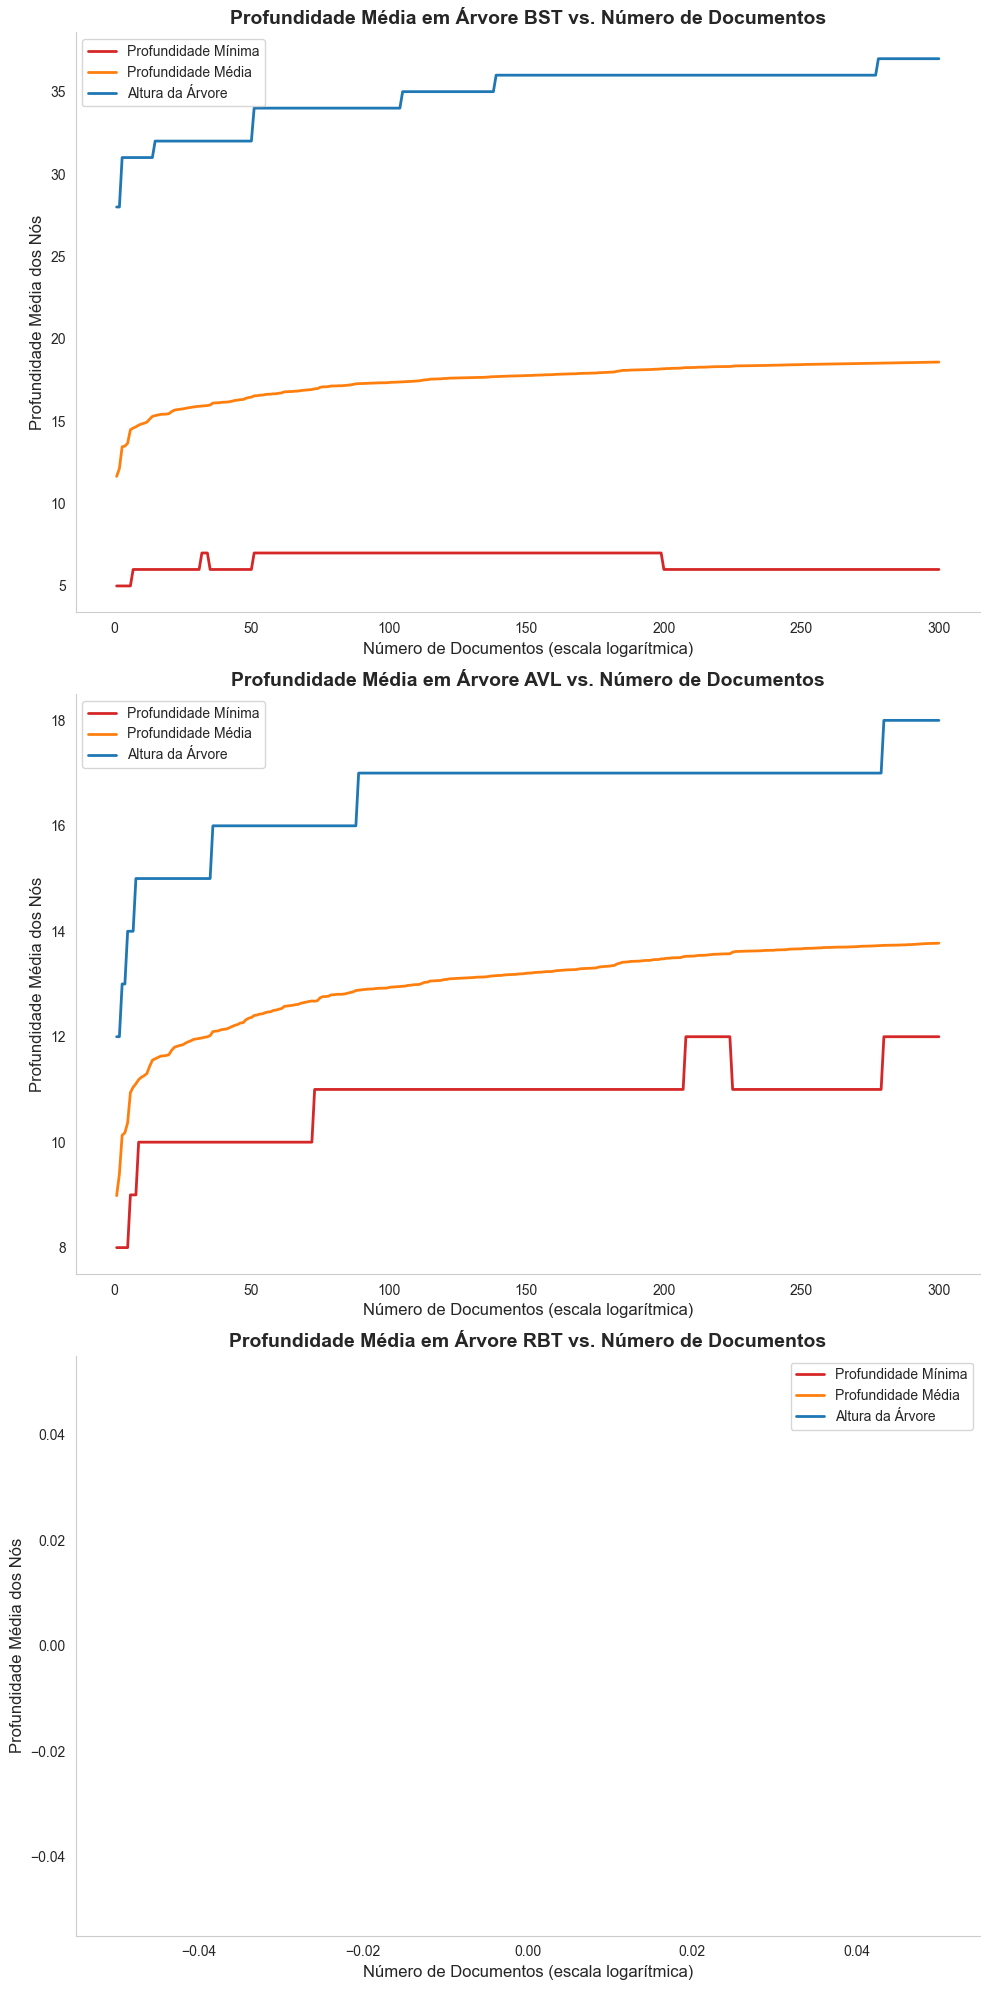

In [ ]:
# Estilo visual
sns.set_style("whitegrid")

plt.figure(figsize=(10,20))

# Grafico da BST
plt.subplot(3,1,1) 

# Dados
n_docs = df[df['Tipo_Arvore'] == 'BST']['Num_Docs']
altura = df[df['Tipo_Arvore'] == 'BST']['Altura']
prof_min = df[df['Tipo_Arvore'] == 'BST']['Profundidade_Minima']
prof_media = df[df['Tipo_Arvore'] == 'BST']['Profundidade_Media']

# Plotagens com cores distintas
plt.plot(n_docs, prof_min, linestyle='-', color='#d62728', label='Profundidade Mínima', linewidth=2, markersize=5)
plt.plot(n_docs, prof_media, linestyle='-', color='#ff7f0e', label='Profundidade Média', linewidth=2, markersize=5)
plt.plot(n_docs, altura,  linestyle='-', color='#1f77b4', label='Altura da Árvore', linewidth=2, markersize=5)

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em Árvore BST vs. Número de Documentos', fontsize=14, fontweight='bold')

plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)

# Grafico da AVL
plt.subplot(3,1,2) 

# Dados
n_docs = df[df['Tipo_Arvore'] == 'AVL']['Num_Docs']
altura = df[df['Tipo_Arvore'] == 'AVL']['Altura']
prof_min = df[df['Tipo_Arvore'] == 'AVL']['Profundidade_Minima']
prof_media = df[df['Tipo_Arvore'] == 'AVL']['Profundidade_Media']

# Plotagens com cores distintas
plt.plot(n_docs, prof_min, linestyle='-', color='#d62728', label='Profundidade Mínima', linewidth=2, markersize=5)
plt.plot(n_docs, prof_media, linestyle='-', color='#ff7f0e', label='Profundidade Média', linewidth=2, markersize=5)
plt.plot(n_docs, altura,  linestyle='-', color='#1f77b4', label='Altura da Árvore', linewidth=2, markersize=5)

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em Árvore AVL vs. Número de Documentos', fontsize=14, fontweight='bold')

plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)

# Grafico da BRT
plt.subplot(3,1,3) 

# Dados
n_docs = df[df['Tipo_Arvore'] == 'BRT']['Num_Docs']
print(n_docs)
altura = df[df['Tipo_Arvore'] == 'BRT']['Altura']
prof_min = df[df['Tipo_Arvore'] == 'BRT']['Profundidade_Minima']
prof_media = df[df['Tipo_Arvore'] == 'BRT']['Profundidade_Media']

# Plotagens com cores distintas
plt.plot(n_docs, prof_min, linestyle='-', color='#d62728', label='Profundidade Mínima', linewidth=2, markersize=5)
plt.plot(n_docs, prof_media, linestyle='-', color='#ff7f0e', label='Profundidade Média', linewidth=2, markersize=5)
plt.plot(n_docs, altura,  linestyle='-', color='#1f77b4', label='Altura da Árvore', linewidth=2, markersize=5)

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em Árvore BRT vs. Número de Documentos', fontsize=14, fontweight='bold')

plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)
# Mostrar gráfico
plt.show()
